## **Importing Libraries**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from filters.ParticleFilter import ParticleFilter
from utils.helper import simulate_ball_throwing, simulate_noisy_observations

import warnings
warnings.filterwarnings('ignore')

## **Define Some Constants**

In [14]:
NOISE_STD = 0.9
INIT_Y1 = 10
INIT_Y2 = 20
INIT_SPEED1 = 20
INIT_SPEED2 = 15
LAUNCH_ANGLE1 = 45
LAUNCH_ANGLE2 = 30
DT = 0.01

## **Ball Throwing Simulation**

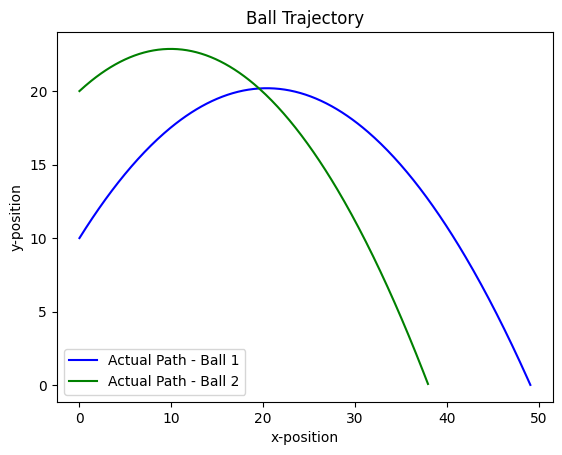

In [15]:
positions1 = simulate_ball_throwing(init_y=INIT_Y1, init_speed=INIT_SPEED1, launch_angle=LAUNCH_ANGLE1, dt=DT, max_time=100)
positions2 = simulate_ball_throwing(init_y=INIT_Y2, init_speed=INIT_SPEED2, launch_angle=LAUNCH_ANGLE2, dt=DT, max_time=100)

plt.plot(positions1[:,0], positions1[:,1], label='Actual Path - Ball 1', linestyle='-', color='blue')
plt.plot(positions2[:,0], positions2[:,1], label='Actual Path - Ball 2', linestyle='-', color='green')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend(loc='lower left')
plt.title('Ball Trajectory')
plt.show()

## **Noisy Observation Simulation**

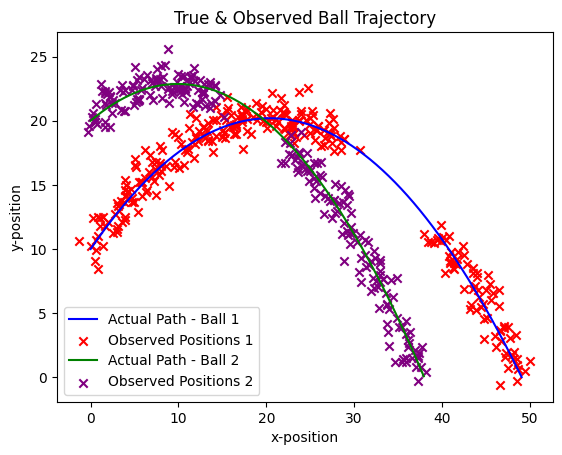

In [16]:
noisy_observations1 = simulate_noisy_observations(positions1, noise_std=NOISE_STD, drop_out_interval=4)
noisy_observations2 = simulate_noisy_observations(positions2, noise_std=NOISE_STD, drop_out_interval=3)

plt.plot(positions1[:,0], positions1[:,1], label='Actual Path - Ball 1', linestyle='-', color='blue')
plt.scatter(noisy_observations1[:,0], noisy_observations1[:,1], color='red', label='Observed Positions 1', marker='x')
plt.plot(positions2[:,0], positions2[:,1], label='Actual Path - Ball 2', linestyle='-', color='green')
plt.scatter(noisy_observations2[:,0], noisy_observations2[:,1], color='purple', label='Observed Positions 2', marker='x')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend(loc='lower left')
plt.title('True & Observed Ball Trajectory')
plt.show()

## **Apply Particle Filter**

In [17]:
std_acceleration = 0.01
std_measurement = NOISE_STD
num_particles = 10000

init_state1 = np.array([0, INIT_Y1, INIT_SPEED1 * np.cos(np.radians(LAUNCH_ANGLE1)), INIT_SPEED1 * np.sin(np.radians(LAUNCH_ANGLE1))])
init_state2 = np.array([0, INIT_Y2, INIT_SPEED2 * np.cos(np.radians(LAUNCH_ANGLE2)), INIT_SPEED2 * np.sin(np.radians(LAUNCH_ANGLE2))])

pf1 = ParticleFilter(num_particles, DT, std_acceleration, std_measurement, init_state1)
pf2 = ParticleFilter(num_particles, DT, std_acceleration, std_measurement, init_state2)

observations1 = [obs if not np.isnan(obs).any() else None for obs in noisy_observations1]
observations2 = [obs if not np.isnan(obs).any() else None for obs in noisy_observations2]

estimates1 = pf1.run_filter(observations1)
estimates2 = pf2.run_filter(observations2)

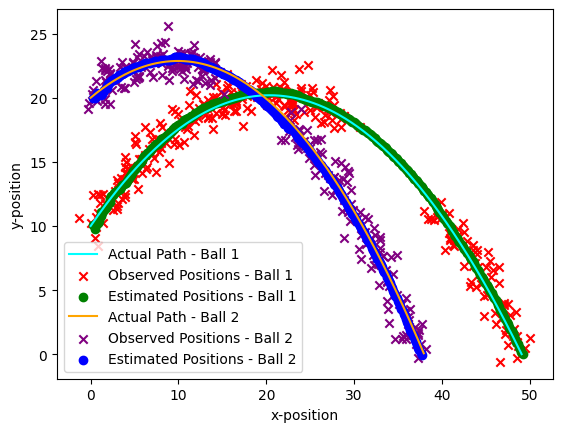

In [18]:
plt.plot(positions1[:,0], positions1[:,1], label='Actual Path - Ball 1', color='cyan')
plt.scatter(noisy_observations1[:,0], noisy_observations1[:,1], color='red', label='Observed Positions - Ball 1', marker='x')
plt.scatter(estimates1[:,0], estimates1[:,1], color='green', label='Estimated Positions - Ball 1')
plt.plot(positions2[:,0], positions2[:,1], label='Actual Path - Ball 2', color='orange')
plt.scatter(noisy_observations2[:,0], noisy_observations2[:,1], color='purple', label='Observed Positions - Ball 2', marker='x')
plt.scatter(estimates2[:,0], estimates2[:,1], color='blue', label='Estimated Positions - Ball 2')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend(loc='lower left')
plt.show()